In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# !unzip '/content/gdrive/My Drive/Movies/posters.zip'
!unzip '/content/gdrive/My Drive/Movies/archive.zip'

In [ ]:
import numpy as np 
import os
from IPython.display import Image as disImage
from PIL import Image
import glob
import keras

import random
from sklearn.neighbors import KNeighborsClassifier
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       os.path.join(dirname, filename)
directory = './SampleMoviePosters/SampleMoviePosters/'
id_list = []

for filename in glob.iglob(f'{directory}/*'):
    f = filename.split('/')
    im = f[-1][:-4]
    id_list.append(im)

print("Number of Posters:",len(id_list))

Number of Posters: 997


In [ ]:
shape = (268, 182, 3)
random.shuffle(id_list)
same_dims = True
image_array_train = []
image_array_val = []
train_size = len(id_list)*9//10
for i in range(len(id_list)):
    file = './SampleMoviePosters/SampleMoviePosters/'+id_list[i]+'.jpg'
    img= Image.open(file)
    np_img = np.array(img)
    if i<train_size:
      image_array_train.append(np_img)
    else:
      image_array_val.append(np_img)
    if  shape != np_img.shape:
        same_dims= False
        print("different shapes")
        print(np_img.shape, 'ID', id_list[i])
if same_dims:
    print("All posters are of same dimentions already.\nAll images have been converted to numpy array")

All posters are of same dimentions already.
All images have been converted to numpy array


In [ ]:
import csv
id_rating_dict = {}
i=0
with open('./MovieGenre.csv', newline='', encoding = "ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        i+=1
        movie_id = row[0]
        rating = row[3]
        id_rating_dict.update({movie_id:rating})

In [ ]:
rating_train = []
rating_val = []
for i in range(len(id_list)):
    rating = float(id_rating_dict[id_list[i]])
    if i<train_size:
      rating_train.append(rating)
    else:
      rating_val.append(rating)

SVR()
0.5094917389716948
0.03179684132290672


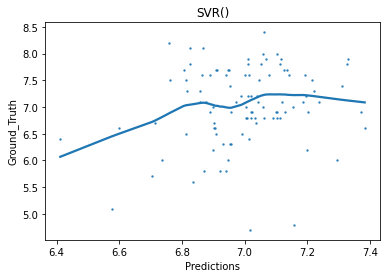

KNeighborsRegressor(n_neighbors=50)
0.5266914
-0.0008882149046793852


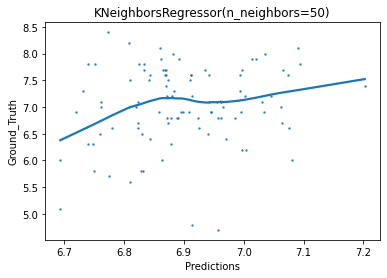

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X_train = np.zeros((len(image_array_train),shape[0]*shape[1]*shape[2]))
X_val = np.zeros((len(image_array_val),shape[0]*shape[1]*shape[2]))

for i in range(len(image_array_train)):
  X_train[i] = image_array_train[i].reshape(shape[0]*shape[1]*shape[2])

for i in range(len(image_array_val)):
  X_val[i] = image_array_val[i].reshape(shape[0]*shape[1]*shape[2])
regressors = [
    svm.SVR(kernel='rbf'),
    KNeighborsRegressor(n_neighbors=50),
]
for item in regressors:
    print(item)
    clf = item
    clf.fit(X_train, rating_train)
    y_pred = clf.predict(X_val)
    print(mean_squared_error(y_pred,rating_val))
    print(clf.score(X_val,rating_val))
    plt.figure()
    scat_data_cl = pd.DataFrame(data={'Predictions':y_pred,'Ground_Truth':rating_val})
    sns.regplot(x='Predictions',y='Ground_Truth',data = scat_data_cl,lowess=True,scatter_kws={'s':2})
    plt.title(item)
    plt.show()